In [2]:
import torch
%load_ext autoreload
%autoreload 2

In [3]:
from model.threedepn import ThreeDEPNDecoder
from util.model import summarize_model

threedepn = ThreeDEPNDecoder()
print(summarize_model(threedepn))

   | Name         | Type             | Params  
-----------------------------------------------------
0  | bottleneck   | Sequential       | 197376  
1  | bottleneck.0 | Linear           | 65792   
2  | bottleneck.1 | ReLU             | 0       
3  | bottleneck.2 | Linear           | 131584  
4  | bottleneck.3 | ReLU             | 0       
5  | decoder1     | Sequential       | 8389376 
6  | decoder1.0   | ConvTranspose3d  | 8388864 
7  | decoder1.1   | BatchNorm3d      | 512     
8  | decoder1.2   | ReLU             | 0       
9  | decoder2     | Sequential       | 2097536 
10 | decoder2.0   | ConvTranspose3d  | 2097280 
11 | decoder2.1   | BatchNorm3d      | 256     
12 | decoder2.2   | ReLU             | 0       
13 | decoder3     | Sequential       | 524480  
14 | decoder3.0   | ConvTranspose3d  | 524352  
15 | decoder3.1   | BatchNorm3d      | 128     
16 | decoder3.2   | ReLU             | 0       
17 | decoder4     | Sequential       | 4097    
18 | decoder4.0   | ConvTranspose3

In [4]:
from data.shapenet import ShapeNet

# Create a dataset with train split
train_dataset = ShapeNet('train', filter_class='lamp')
val_dataset = ShapeNet('val', filter_class='lamp')
test_dataset = ShapeNet('test', filter_class='lamp')

print(f'Length of train set: {len(train_dataset)}')  # expected output: 153540
print(f'Length of val set: {len(val_dataset)}')  # expected output: 153540
print(f'Length of test set: {len(test_dataset)}')  # expected output: 64

Length of train set: 1854
Length of val set: 232
Length of test set: 232


In [5]:
from util.visualization import visualize_mesh
from skimage.measure import marching_cubes

sample = test_dataset[231]
print(f'Target DF: {sample["target_df"].shape}')  # expected output: (32, 32, 32)
print(f'Target DF: {type(sample["target_df"])}')  # expected output: <class 'numpy.ndarray'>

input_mesh = marching_cubes(sample['target_df'], level=1)
visualize_mesh(input_mesh[0], input_mesh[1], flip_axes=True)

Target DF: (32, 32, 32)
Target DF: <class 'numpy.ndarray'>


Output()

In [6]:
##################
#                #
#    TRAINING    #
#                #
##################

In [7]:
# AIRPLANE AD
from scripts import train
config = {
    'experiment_name': 'airplane_ad',
    'device': 'cuda:0',
    'is_overfit': False,
    'batch_size': 64,
    'learning_rate_model': 0.01,
    'learning_rate_code': 0.01,
    'learning_rate_log_var':0.01,
    'max_epochs': 1000,
    'print_every_n': 100,
    'latent_code_length' : 256,
    'scheduler_step_size': 100,
    'vad_free' : False,
    'test': False,
    'kl_weight': 0.03,
    'kl_weight_increase_every_epochs': 100,
    'kl_weight_increase_value': 0.0,
    'iou_every_epoch': 50,
    'resume_ckpt': None,
    'filter_class': 'airplane',
    'decoder_var' : False
}
train.main(config)

Using device: cuda:0
Data length 3236
Training params: 2
[001/00048] train_loss: 0.106201 kl_loss: 0.000000 normal_loss: 0.106201
[003/00046] train_loss: 0.042423 kl_loss: 0.000000 normal_loss: 0.042423
[005/00044] train_loss: 0.035614 kl_loss: 0.000000 normal_loss: 0.035614
[007/00042] train_loss: 0.031330 kl_loss: 0.000000 normal_loss: 0.031330
[009/00040] train_loss: 0.029408 kl_loss: 0.000000 normal_loss: 0.029408
[011/00038] train_loss: 0.028273 kl_loss: 0.000000 normal_loss: 0.028273
[013/00036] train_loss: 0.025522 kl_loss: 0.000000 normal_loss: 0.025522
[015/00034] train_loss: 0.024653 kl_loss: 0.000000 normal_loss: 0.024653
[017/00032] train_loss: 0.025657 kl_loss: 0.000000 normal_loss: 0.025657
[019/00030] train_loss: 0.022715 kl_loss: 0.000000 normal_loss: 0.022715
[021/00028] train_loss: 0.021348 kl_loss: 0.000000 normal_loss: 0.021348
[023/00026] train_loss: 0.020369 kl_loss: 0.000000 normal_loss: 0.020369
[025/00024] train_loss: 0.024364 kl_loss: 0.000000 normal_loss: 0.0

In [44]:
# TABLE AD
from scripts import train
config = {
    'experiment_name': 'table_ad',
    'device': 'cuda:0',
    'is_overfit': False,
    'batch_size': 64,
    'learning_rate_model': 0.01,
    'learning_rate_code': 0.01,
    'learning_rate_log_var':0.01,
    'max_epochs': 1000,
    'print_every_n': 100,
    'latent_code_length' : 256,
    'scheduler_step_size': 100,
    'vad_free' : False,
    'test': False,
    'kl_weight': 0.03,
    'kl_weight_increase_every_epochs': 100,
    'kl_weight_increase_value': 0.0,
    'iou_every_epoch': 50,
    'resume_ckpt': None,
    'filter_class': 'table',
    'decoder_var' : False
}
train.main(config)

Using device: cuda:0
Data length 4800
Training params: 2
[001/00024] train_loss: 0.168495 kl_loss: 0.000000 normal_loss: 0.168495
[002/00049] train_loss: 0.117954 kl_loss: 0.000000 normal_loss: 0.117954
[003/00074] train_loss: 0.109562 kl_loss: 0.000000 normal_loss: 0.109562
[005/00024] train_loss: 0.105227 kl_loss: 0.000000 normal_loss: 0.105227
[006/00049] train_loss: 0.097987 kl_loss: 0.000000 normal_loss: 0.097987
[007/00074] train_loss: 0.095581 kl_loss: 0.000000 normal_loss: 0.095581
[009/00024] train_loss: 0.091399 kl_loss: 0.000000 normal_loss: 0.091399
[010/00049] train_loss: 0.086116 kl_loss: 0.000000 normal_loss: 0.086116
[011/00074] train_loss: 0.082822 kl_loss: 0.000000 normal_loss: 0.082822
[013/00024] train_loss: 0.076092 kl_loss: 0.000000 normal_loss: 0.076092
[014/00049] train_loss: 0.073706 kl_loss: 0.000000 normal_loss: 0.073706
[015/00074] train_loss: 0.068664 kl_loss: 0.000000 normal_loss: 0.068664
[017/00024] train_loss: 0.065321 kl_loss: 0.000000 normal_loss: 0.0

In [43]:
# CHAIR AD
from scripts import train
config = {
    'experiment_name': 'chair_ad',
    'device': 'cuda:0',
    'is_overfit': False,
    'batch_size': 64,
    'learning_rate_model': 0.01,
    'learning_rate_code': 0.01,
    'learning_rate_log_var':0.01,
    'max_epochs': 1000,
    'print_every_n': 100,
    'latent_code_length' : 256,
    'scheduler_step_size': 100,
    'vad_free' : False,
    'test': False,
    'kl_weight': 0.03,
    'kl_weight_increase_every_epochs': 100,
    'kl_weight_increase_value': 0.0,
    'iou_every_epoch': 50,
    'resume_ckpt': None,
    'filter_class': 'chair',
    'decoder_var' : False
}
train.main(config)

Using device: cuda:0
Data length 4800
Training params: 2
[001/00024] train_loss: 0.164451 kl_loss: 0.000000 normal_loss: 0.164451
[002/00049] train_loss: 0.116169 kl_loss: 0.000000 normal_loss: 0.116169
[003/00074] train_loss: 0.113166 kl_loss: 0.000000 normal_loss: 0.113166
[005/00024] train_loss: 0.106087 kl_loss: 0.000000 normal_loss: 0.106087
[006/00049] train_loss: 0.100100 kl_loss: 0.000000 normal_loss: 0.100100
[007/00074] train_loss: 0.095202 kl_loss: 0.000000 normal_loss: 0.095202
[009/00024] train_loss: 0.089955 kl_loss: 0.000000 normal_loss: 0.089955
[010/00049] train_loss: 0.085373 kl_loss: 0.000000 normal_loss: 0.085373
[011/00074] train_loss: 0.082074 kl_loss: 0.000000 normal_loss: 0.082074
[013/00024] train_loss: 0.077538 kl_loss: 0.000000 normal_loss: 0.077538
[014/00049] train_loss: 0.075404 kl_loss: 0.000000 normal_loss: 0.075404
[015/00074] train_loss: 0.071963 kl_loss: 0.000000 normal_loss: 0.071963
[017/00024] train_loss: 0.069499 kl_loss: 0.000000 normal_loss: 0.0

In [ ]:
# TABLE VAD
from scripts import train
config = {
    'experiment_name': 'table_vad',
    'device': 'cuda:0',
    'is_overfit': False,
    'batch_size': 64,
    'learning_rate_model': 0.01,
    'learning_rate_code': 0.01,
    'learning_rate_log_var':0.01,
    'max_epochs': 1000,
    'print_every_n': 100,
    'latent_code_length' : 256,
    'scheduler_step_size': 100,
    'vad_free' : True,
    'test': False,
    'kl_weight': 0.03,
    'kl_weight_increase_every_epochs': 100,
    'kl_weight_increase_value': 0.01,
    'resume_ckpt': 'table_vad',
    'filter_class': 'table',
    'decoder_var' : True
}
train.main(config)

In [ ]:
# AIRPLANE VAD
from scripts import train
config = {
    'experiment_name': 'airplane_vad',
    'device': 'cuda:0',
    'is_overfit': False,
    'batch_size': 64,
    'learning_rate_model': 0.01,
    'learning_rate_code': 0.01,
    'learning_rate_log_var':0.01,
    'max_epochs': 1000,
    'print_every_n': 100,
    'latent_code_length' : 256,
    'scheduler_step_size': 100,
    'vad_free' : True,
    'test': False,
    'kl_weight': 0.03,
    'kl_weight_increase_every_epochs': 100,
    'kl_weight_increase_value': 0.0,
    'resume_ckpt': 'airplane_vad',
    'filter_class': 'airplane',
    'decoder_var' : True
}
train.main(config)

In [166]:
# CHAIR VAD
from scripts import train
config = {
    'experiment_name': 'chair_vad',
    'device': 'cuda:0',
    'is_overfit': False,
    'batch_size': 64,
    'learning_rate_model': 0.01,
    'learning_rate_code': 0.01,
    'learning_rate_log_var':0.01,
    'max_epochs': 1000,
    'print_every_n': 100,
    'latent_code_length' : 256,
    'scheduler_step_size': 100,
    'vad_free' : True,
    'test': False,
    'kl_weight': 0.03,
    'kl_weight_increase_every_epochs': 100,
    'kl_weight_increase_value': 0.0,
    'mmd_every_epoch': 50,
    'tmd_every_epoch': 50,
    'iou_every_epoch': 10,
    'resume_ckpt': None,
    'filter_class': 'chair',
    'decoder_var' : True
}
train.main(config)

Using device: cuda:0
Data length 4800
Training params: 3
[001/00024] train_loss: 0.178638 kl_loss: 0.492069 normal_loss: 0.163876
[002/00049] train_loss: 0.133184 kl_loss: 0.440588 normal_loss: 0.119966
[003/00074] train_loss: 0.126972 kl_loss: 0.387870 normal_loss: 0.115336
[005/00024] train_loss: 0.122300 kl_loss: 0.344194 normal_loss: 0.111974
[006/00049] train_loss: 0.117572 kl_loss: 0.326850 normal_loss: 0.107766
[007/00074] train_loss: 0.114495 kl_loss: 0.316428 normal_loss: 0.105002
[009/00024] train_loss: 0.109007 kl_loss: 0.302268 normal_loss: 0.099939
[010/00049] train_loss: 0.107026 kl_loss: 0.290253 normal_loss: 0.098318
[011/00074] train_loss: 0.105014 kl_loss: 0.278051 normal_loss: 0.096672
[013/00024] train_loss: 0.103401 kl_loss: 0.266038 normal_loss: 0.095420
[014/00049] train_loss: 0.099887 kl_loss: 0.255598 normal_loss: 0.092219
[015/00074] train_loss: 0.098646 kl_loss: 0.247489 normal_loss: 0.091221
[017/00024] train_loss: 0.097429 kl_loss: 0.241518 normal_loss: 0.0

In [246]:
# CHAIR VAD
from scripts import train
config = {
    'experiment_name': 'chair_vad_0.05kl',
    'device': 'cuda:0',
    'is_overfit': False,
    'batch_size': 64,
    'learning_rate_model': 0.01,
    'learning_rate_code': 0.01,
    'learning_rate_log_var':0.01,
    'max_epochs': 1000,
    'print_every_n': 100,
    'latent_code_length' : 256,
    'scheduler_step_size': 100,
    'vad_free' : True,
    'test': False,
    'kl_weight': 0.05,
    'kl_weight_increase_every_epochs': 100,
    'kl_weight_increase_value': 0.0,
    'mmd_every_epoch': 50,
    'tmd_every_epoch': 50,
    'iou_every_epoch': 10,
    'resume_ckpt': None,
    'filter_class': 'chair',
    'decoder_var' : True
}
train.main(config)

Using device: cuda:0
Data length 4800
Training params: 3
[001/00024] train_loss: 0.191461 kl_loss: 0.489047 normal_loss: 0.167009
[002/00049] train_loss: 0.140902 kl_loss: 0.431867 normal_loss: 0.119309
[003/00074] train_loss: 0.134114 kl_loss: 0.373703 normal_loss: 0.115429
[005/00024] train_loss: 0.127796 kl_loss: 0.320461 normal_loss: 0.111773
[006/00049] train_loss: 0.126211 kl_loss: 0.293880 normal_loss: 0.111517
[007/00074] train_loss: 0.120764 kl_loss: 0.279733 normal_loss: 0.106777
[009/00024] train_loss: 0.115604 kl_loss: 0.259998 normal_loss: 0.102604
[010/00049] train_loss: 0.110620 kl_loss: 0.244606 normal_loss: 0.098390
[011/00074] train_loss: 0.108912 kl_loss: 0.229203 normal_loss: 0.097452
[013/00024] train_loss: 0.105591 kl_loss: 0.212820 normal_loss: 0.094950
[014/00049] train_loss: 0.105521 kl_loss: 0.200961 normal_loss: 0.095473
[015/00074] train_loss: 0.103065 kl_loss: 0.190483 normal_loss: 0.093541
[017/00024] train_loss: 0.099156 kl_loss: 0.183402 normal_loss: 0.0

In [83]:
# CAR VAD
from scripts import train
config = {
    'experiment_name': 'car_vad_inckl',
    'device': 'cuda:0',
    'is_overfit': False,
    'batch_size': 64,
    'learning_rate_model': 0.01,
    'learning_rate_code': 0.01,
    'learning_rate_log_var':0.01,
    'max_epochs': 1000,
    'print_every_n': 100,
    'latent_code_length' : 256,
    'scheduler_step_size': 100,
    'vad_free' : True,
    'test': False,
    'kl_weight': 0.03,
    'kl_weight_increase_every_epochs': 100,
    'kl_weight_increase_value': 0.01,
    'mmd_every_epoch': 150,
    'tmd_every_epoch': 150,
    'iou_every_epoch': 10,
    'resume_ckpt': None,
    'filter_class': 'car',
    'decoder_var' : True
}
train.main(config)

Using device: cuda:0
Data length 4759
Training params: 3
[001/00024] train_loss: 0.132930 kl_loss: 0.489686 normal_loss: 0.118239
[002/00049] train_loss: 0.064729 kl_loss: 0.437561 normal_loss: 0.051602
[003/00074] train_loss: 0.056203 kl_loss: 0.380036 normal_loss: 0.044802
[005/00024] train_loss: 0.050707 kl_loss: 0.321116 normal_loss: 0.041073
[006/00049] train_loss: 0.048632 kl_loss: 0.278793 normal_loss: 0.040268
[007/00074] train_loss: 0.048382 kl_loss: 0.241229 normal_loss: 0.041145
[009/00024] train_loss: 0.046202 kl_loss: 0.205635 normal_loss: 0.040033
[010/00049] train_loss: 0.044013 kl_loss: 0.181615 normal_loss: 0.038564
[011/00074] train_loss: 0.042220 kl_loss: 0.163693 normal_loss: 0.037309
[013/00024] train_loss: 0.040937 kl_loss: 0.147190 normal_loss: 0.036522
[014/00049] train_loss: 0.038372 kl_loss: 0.135115 normal_loss: 0.034318
[015/00074] train_loss: 0.037457 kl_loss: 0.123486 normal_loss: 0.033752
[017/00024] train_loss: 0.035731 kl_loss: 0.109828 normal_loss: 0.0

In [10]:
#####################
#                   #
#    VISUALIZING    #
#                   #
#####################

In [351]:
from scripts.visualize import visualize_dataset_sample, visualize_ad, visualize_vad, visualize_vad_norm, visualize_vad_norm, visualize_interpolation_ad, visualize_latent_space, visualize_interpolation_ad_steps


In [352]:
visualize_interpolation_ad_steps("airplane_vad", 0, 1)

0 1
0.7900000000000004 0.20999999999999963


Output()

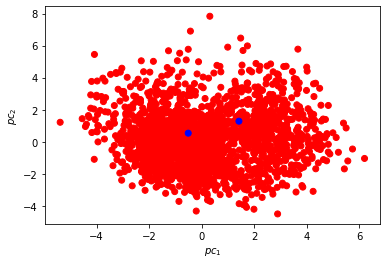

In [350]:
visualize_latent_space("airplane_vad", [859, 500])

In [163]:
import random
experiment = "sofa_chair_vad"
experiment2 = "sofa_ad"
# experiment2 = "sofa_ad"
filter_class = "airplane"
index = 4123
# index1 = random.choice(range(len(ShapeNet('train', filter_class = filter_class))))
# index2 = random.choice(range(len(ShapeNet('train', filter_class = filter_class))))
# index1 = random.choice(range(8000))
# index2 = random.choice(range(8000))
index1 = 1757        
index2 = 1841
a1 = 0.9
a2 = 1 - a1
#-------
# visualize_ad("airplane_ad", index1)
#-------
# visualize_vad_norm("car_vad_inckl")
# visualize_vad_norm("table_vad")
# visualize_vad_norm(experiment)
# visualize_ad(experiment, index1)
# visualize_vad_norm(experiment2)
# visualize_ad(experiment, index)
#-------
# visualize_vad_norm(experiment)
# visualize_vad_norm(experiment2)
# visualize_dataset_sample(filter_class, index)
#-------
print(index1, index2)
visualize_interpolation_ad(experiment, index1, index2, a1, a2)
visualize_ad(experiment, index1)
visualize_ad(experiment, index2)

1757 1841


Output()

Output()

Output()

In [53]:
####################
#                  #
#    EVALUATION    #
#                  #
####################

In [353]:
from scripts.evaluate import generate_samples, convert_df_to_point_cloud, chamfer_distance, MMD, convert_set_to_point_cloud, visualize_point_cloud, _mmd, TMD, IOU, min_sample, ONE_NN
from util.visualization import visualize_mesh
from skimage.measure import marching_cubes
import numpy as np
import random

In [361]:
# 1-NN
# one_nn = ONE_NN('airplane_vad', 'val', 'airplane', device=torch.device('cuda:0'))
# print(f'airplane 1-NN: {one_nn}')
# one_nn = ONE_NN('chair_vad_0.05kl', 'val', 'chair', device=torch.device('cuda:0'))
# print(f'chair 1-NN: {one_nn}')
one_nn = ONE_NN('car_vad', 'val', 'car', device=torch.device('cuda:0'))
print(f'car 1-NN: {one_nn}')

validation set samples: 297
Sample 0 done. 1.0
Sample 1 done. 1.0
Sample 2 done. 1.0
Sample 3 done. 0.75
Sample 4 done. 0.8
Sample 5 done. 0.8333333333333334
Sample 6 done. 0.8571428571428571
Sample 7 done. 0.875
Sample 8 done. 0.8888888888888888
Sample 9 done. 0.9
Sample 10 done. 0.9090909090909091
Sample 11 done. 0.9166666666666666
Sample 12 done. 0.9230769230769231
Sample 13 done. 0.9285714285714286
Sample 14 done. 0.9333333333333333
Sample 15 done. 0.9375
Sample 16 done. 0.9411764705882353
Sample 17 done. 0.9444444444444444
Sample 18 done. 0.9473684210526315
Sample 19 done. 0.95
Sample 20 done. 0.9523809523809523
Sample 21 done. 0.9545454545454546
Sample 22 done. 0.9565217391304348
Sample 23 done. 0.9583333333333334
Sample 24 done. 0.96
Sample 25 done. 0.9615384615384616
Sample 26 done. 0.9629629629629629
Sample 27 done. 0.9642857142857143
Sample 28 done. 0.9655172413793104
Sample 29 done. 0.9333333333333333
Sample 30 done. 0.9354838709677419
Sample 31 done. 0.9375
Sample 32 done. 

In [28]:
# MMD
mmd, mmds = MMD('airplane_vad', 'val', 'airplane', n_samples=10, device=torch.device('cuda:0'))
print(f'airplane mmd: {mmd}')
mmd, mmds = MMD('chair_vad_0.05kl', 'val', 'chair', n_samples=10, device=torch.device('cuda:0'))
print(f'chair mmd: {mmd}')
mmd, mmds = MMD('table_vad', 'val', 'table', n_samples=10, device=torch.device('cuda:0'))
print(f'table mmd: {mmd}')
# avg: 4.9

airplane mmd: 0.004007788375020027
chair mmd: 0.005049305967986584
table mmd: 0.0055902316235005856


In [29]:
# TMD
tmd, samples = TMD('airplane_vad', n_samples=10, device=torch.device('cuda:0'))
tmd
print(f'airplane mmd: {tmd}')
tmd, samples = TMD('chair_vad_0.05kl', n_samples=10, device=torch.device('cuda:0'))
tmd
print(f'chair mmd: {tmd}')
tmd, samples = TMD('table_vad', n_samples=10, device=torch.device('cuda:0'))
tmd
print(f'table mmd: {tmd}')
# avg: 5.17

airplane mmd: 0.03189944103360176
chair mmd: 0.06351591646671295
table mmd: 0.05973496288061142


In [ ]:
########################################################################################################################################

In [ ]:
####################
#                  #
#    PLAYGROUND    #
#                  #
####################

In [141]:
# MIN SAMPLE
# generate n new samples
n = 50
samples = generate_samples('car_vad', n)
samples = samples.squeeze(1)

In [153]:
# get min cf distance to val
index = 35
sample, cf_distance = min_sample('val', 'car', samples[index], device=torch.device('cuda:0'))
# visualize
input_mesh = marching_cubes(sample.cpu().detach().numpy(), level=1)
visualize_mesh(input_mesh[0], input_mesh[1], flip_axes=True)
input_mesh = marching_cubes(samples[index].cpu().detach().numpy(), level=1)
visualize_mesh(input_mesh[0], input_mesh[1], flip_axes=True)

Output()

Output()

In [12]:
cf_distance

tensor(0.0036, device='cuda:0')

In [37]:
pc = convert_df_to_point_cloud(sample)
chamfer_distance(convert_df_to_point_cloud(sample), convert_df_to_point_cloud(sample))

tensor(0.0018)

In [22]:
pc.unsqueeze(0).cuda().shape

torch.Size([1, 2048, 3])

In [38]:
from chamferdist  import ChamferDistance
chamfer_dist = ChamferDistance()
dist1 = chamfer_dist(convert_df_to_point_cloud(sample).unsqueeze(0).cuda(), convert_df_to_point_cloud(sample).unsqueeze(0).cuda())
print(dist1)

tensor(0.0019, device='cuda:0')


In [325]:
val = []
val_dataset = ShapeNet('val', filter_class='airplane')
for data_dict in val_dataset:
    target_df = torch.from_numpy(data_dict['target_df']).float()
    val.append(target_df)
val = torch.stack(val)

In [326]:
pcs = convert_set_to_point_cloud(val[:1])
pcs2 = convert_set_to_point_cloud(val[:1])

In [327]:
_mmd(pcs, pcs2)

tensor([0.0016])

In [271]:
index = 5
input_mesh = marching_cubes(samples[index].cpu().detach().numpy(), level=1)
visualize_mesh(input_mesh[0], input_mesh[1], flip_axes=True)

Output()

In [7]:
# generate n new samples
n = 10
samples = generate_samples('table_vad', n)
samples = samples.squeeze(1)
# convert_set_to_point_cloud(samples)

In [119]:
index = 8
input_mesh = marching_cubes(samples[index].detach().numpy(), level=1)
visualize_mesh(input_mesh[0], input_mesh[1], flip_axes=True)

Output()